In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
file_df = pd.read_csv('data/filtered_nyt_Florida_Man_data.csv')

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_axisbelow'

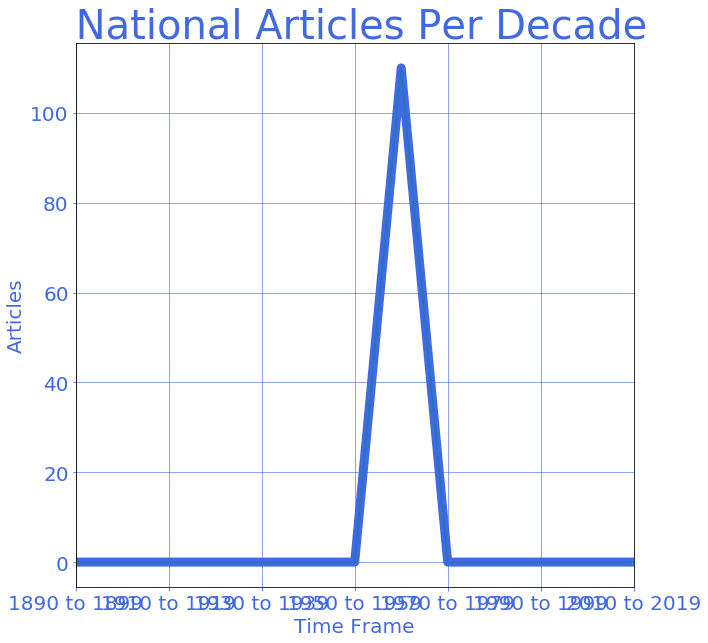

In [66]:
#convert the date field to a string and pull out the Year only
file_df['Time'] = file_df['Time'].apply(pd.to_datetime, errors='coerce')
file_df['Time'] = file_df['Time'].dt.strftime('%Y')

#convert Date filed to a number
file_df['Time'] = file_df['Time'].apply(pd.to_numeric, errors='coerce')
graph_df = pd.DataFrame(file_df) #file_df.to_csv('data/test.csv', index=False)

#create Bin to Show By Decate article count
sort = [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000,2010,2020]

# Create labels for these bins
group_labels = ["1890 to 1899", "1900 to 1909", 
                "1910 to 1919", "1920 to 1929", 
                "1930 to 1939", "1940 to 1949",
                "1950 to 1959", "1960 to 1969", 
                "1970 to 1979", "1980 to 1989", 
                "1990 to 1999", "2000 to 2009", "2010 to 2019"]

# Slice the data and place it into bins
pd.cut(graph_df["Time"], bins=sort, labels=group_labels).head()


# Place the data series into a new column inside of the DataFrame
graph_df["Decades"] = pd.cut(graph_df["Time"], bins=sort, labels=group_labels)

g_group = graph_df.groupby(["Decades"])
gd = g_group["Title"].count()

group = pd.DataFrame({"Article Count": gd})

#lt.xticks(g_group['Title'], g_group.index.values
gd.plot.line(color='royalblue',linewidth=9)
gd.plot(figsize=(10,10))

# Incorporate the other graph properties
plt.title(" National Articles Per Decade",color='royalblue', fontsize =40)
plt.ylabel("Articles", color='royalblue', fontsize = 20)
plt.xlabel("Time Frame", color='royalblue', fontsize =20)
plt.grid(which='both',color='royalblue', alpha=.75)

#plt.minorticks_on()
plt.xticks(rotation=30)
plt.rc('xtick',color='royalblue', labelsize=20) 
plt.rc('ytick', color='royalblue',labelsize=20)
plt.margins(x=0.1, y=0.05)


# Save the figure
plt.savefig("data/NTY_Line.png")


# Show plot
plt.show()

In [64]:
#filter properties
clean_df = graph_df.loc[graph_df['Time'] >= 1999]

#DF structure
clean_df = clean_df.groupby(["Time"])
gd = clean_df["Title"].count()

group = pd.DataFrame({"Article Count": gd})

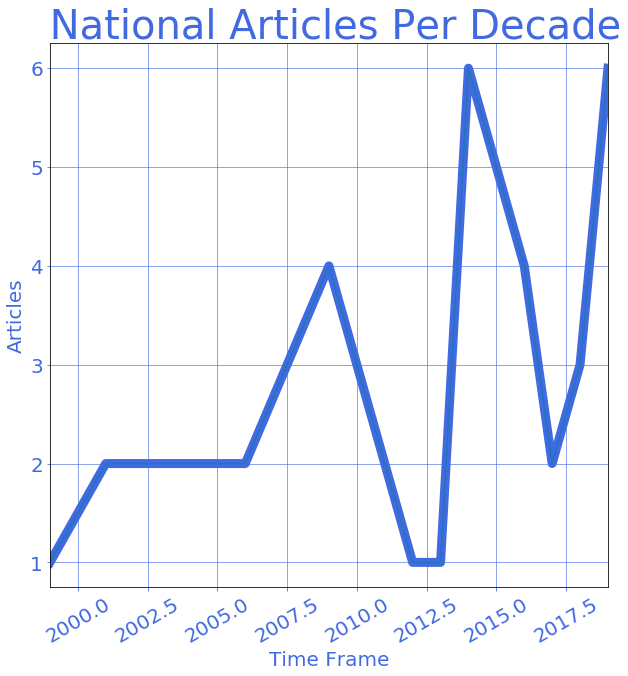

In [65]:
#lt.xticks(g_group['Title'], g_group.index.values
gd.plot.line(color='royalblue',linewidth=9)
gd.plot(figsize=(10,10))

# Incorporate the other graph properties
plt.title(" National Articles Per Decade",color='royalblue', fontsize =40)
plt.ylabel("Articles", color='royalblue', fontsize = 20)
plt.xlabel("Time Frame", color='royalblue', fontsize =20)
plt.grid(which='both',color='royalblue', alpha=.75)
#plt.minorticks_on()
plt.xticks(rotation=30)
plt.rc('xtick',color='royalblue', labelsize=20) 
plt.rc('ytick', color='royalblue',labelsize=20)
plt.margins(x=0.1, y=0.05)


# Save the figure
plt.savefig("data/NTY_line_trend.png")


# Show plot
plt.show()